In [58]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import os
from datetime import datetime
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
from collections import Counter
import math
from category_encoders import TargetEncoder,CatBoostEncoder

In [87]:
data = pd.read_csv('train_0irEZ2H.csv')
target = np.log(data.units_sold)

In [88]:
data.week = pd.to_datetime(data.week)
data['month'] = data['week'].dt.month
data['day'] = data['week'].dt.day
data['year'] = data['week'].dt.year
data['weeks'] = data['week'].dt.week
data['daysofweek'] = data['week'].dt.dayofweek
data['daysofyear'] = data['week'].dt.dayofyear
data.drop('week', axis =1, inplace= True)

In [89]:
data["Store*Base"] = data['total_price']*data['base_price']

In [90]:
#a =pd.crosstab(index = data.sku_id,columns=[data['year']],values = data['total_price'],aggfunc='mean').reset_index()
#b= a.melt(id_vars='sku_id',value_name='avg_yearly_price')
#data = data.merge(b,on=['sku_id','year'])
a =pd.crosstab(index = data.sku_id,columns=[data['weeks']],values = data['total_price'],aggfunc='mean').reset_index()
b= a.melt(id_vars='sku_id',value_name='avg_weekly_price')
data = data.merge(b,on=['sku_id','weeks'])
#a =pd.crosstab(index = data.sku_id,columns=[data['month']],values = data['total_price'],aggfunc='mean').reset_index()
#b= a.melt(id_vars='sku_id',value_name='avg_monthly_price')
#data = data.merge(b,on=['sku_id','month'])

In [91]:
data = data.drop(['units_sold'], axis = 1)

In [92]:
data.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,day,year,weeks,daysofweek,daysofyear,Store*Base,avg_weekly_price
0,1,8091,216418,99.0375,111.8625,0,0,1,17,2011,3,0,17,11078.582344,89.313971
1,17,8095,216418,99.0375,99.0375,0,0,1,17,2011,3,0,17,9808.426406,89.313971
2,42,8094,216418,87.6375,87.6375,0,1,1,17,2011,3,0,17,7680.331406,89.313971
3,68,8063,216418,82.6500,82.6500,0,1,1,17,2011,3,0,17,6831.022500,89.313971
4,93,8023,216418,98.3250,88.3500,0,1,1,17,2011,3,0,17,8687.013750,89.313971


In [93]:
key = np.where(data.columns)[0].tolist()
values = list(data.columns.values)
dic = dict(zip(key,values))
dic

{0: 'record_ID',
 1: 'store_id',
 2: 'sku_id',
 3: 'total_price',
 4: 'base_price',
 5: 'is_featured_sku',
 6: 'is_display_sku',
 7: 'month',
 8: 'day',
 9: 'year',
 10: 'weeks',
 11: 'daysofweek',
 12: 'daysofyear',
 13: 'Store*Base',
 14: 'avg_weekly_price'}

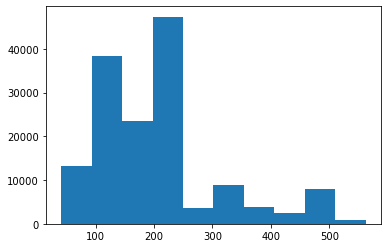

In [79]:
a1= plt.hist(data.total_price)

In [98]:
data.weeks = data.weeks.astype(np.int)
for i in [0,1,2,5,6,9]:
    data[dic[i]] =data[dic[i]].astype('object')
cat_var = np.where(data.dtypes == np.object)[0]


In [99]:
cat_var

array([0, 1, 2, 5, 6, 9], dtype=int64)

In [100]:
x_train,x_test,y_train,y_test = train_test_split(data.values,target.values,test_size = 0.25, random_state = 100)

In [ ]:
cat = CatBoostRegressor(iterations=500)
model = cat.fit(x_train,y_train,cat_features = cat_var)

Learning rate set to 0.153238
0:	learn: 0.8903279	total: 458ms	remaining: 3m 48s
1:	learn: 0.8823605	total: 817ms	remaining: 3m 23s
2:	learn: 0.8768525	total: 892ms	remaining: 2m 27s
3:	learn: 0.8718668	total: 1.19s	remaining: 2m 28s
4:	learn: 0.8681664	total: 1.44s	remaining: 2m 22s
5:	learn: 0.8657615	total: 1.89s	remaining: 2m 35s
6:	learn: 0.8633036	total: 2.03s	remaining: 2m 22s
7:	learn: 0.8626187	total: 2.34s	remaining: 2m 24s
8:	learn: 0.8607886	total: 2.41s	remaining: 2m 11s
9:	learn: 0.8592238	total: 2.67s	remaining: 2m 10s
10:	learn: 0.8579934	total: 2.91s	remaining: 2m 9s
11:	learn: 0.8570588	total: 3.39s	remaining: 2m 17s
12:	learn: 0.8564056	total: 3.53s	remaining: 2m 12s
13:	learn: 0.8557258	total: 3.67s	remaining: 2m 7s
14:	learn: 0.8551380	total: 4.13s	remaining: 2m 13s
15:	learn: 0.8549149	total: 4.7s	remaining: 2m 22s
16:	learn: 0.8542089	total: 5.2s	remaining: 2m 27s
17:	learn: 0.8528120	total: 5.68s	remaining: 2m 32s
18:	learn: 0.8521898	total: 5.96s	remaining: 2m 

158:	learn: 0.8301357	total: 1m 8s	remaining: 2m 26s
159:	learn: 0.8299367	total: 1m 9s	remaining: 2m 26s
160:	learn: 0.8298336	total: 1m 9s	remaining: 2m 26s
161:	learn: 0.8296573	total: 1m 10s	remaining: 2m 26s
162:	learn: 0.8295948	total: 1m 10s	remaining: 2m 25s
163:	learn: 0.8295364	total: 1m 10s	remaining: 2m 25s
164:	learn: 0.8294875	total: 1m 11s	remaining: 2m 24s
165:	learn: 0.8293984	total: 1m 11s	remaining: 2m 24s
166:	learn: 0.8293327	total: 1m 12s	remaining: 2m 23s
167:	learn: 0.8292667	total: 1m 12s	remaining: 2m 23s
168:	learn: 0.8291888	total: 1m 12s	remaining: 2m 22s
169:	learn: 0.8291723	total: 1m 13s	remaining: 2m 22s
170:	learn: 0.8290472	total: 1m 13s	remaining: 2m 21s
171:	learn: 0.8288971	total: 1m 14s	remaining: 2m 21s
172:	learn: 0.8287263	total: 1m 14s	remaining: 2m 21s
173:	learn: 0.8286611	total: 1m 15s	remaining: 2m 20s
174:	learn: 0.8285902	total: 1m 15s	remaining: 2m 20s
175:	learn: 0.8284533	total: 1m 15s	remaining: 2m 19s
176:	learn: 0.8283685	total: 1m

In [ ]:
y_pred = model.predict(x_train)
print(math.sqrt(mean_squared_log_error(np.exp(y_train),np.exp(y_pred)))*100)
y_pred = model.predict(x_test)
print(math.sqrt(mean_squared_log_error(np.exp(y_test),np.exp(y_pred)))*100)

In [71]:
pd.DataFrame(model.feature_importances_,data.columns)

,0
record_ID,0.000000
store_id,8.036090
sku_id,10.163460
base_price,5.220685
is_featured_sku,0.447714
is_display_sku,1.021042
month,2.605880
day,7.013134
year,3.159939
weeks,5.242249


In [42]:
test = pd.read_csv('test_nfaJ3J5.csv')
test = test.drop(['record_ID'], axis =1)

In [43]:
test.week = pd.to_datetime(test.week)
test['month'] = test['week'].dt.month
test['day'] = test['week'].dt.day
test['year'] = test['week'].dt.year
test['weeks'] = test['week'].dt.week
test['daysofweek'] = test['week'].dt.dayofweek
test['daysofyear'] = test['week'].dt.dayofyear
test.drop('week', axis =1, inplace= True)

In [44]:
test["Store*Base"] = test['total_price']*test['base_price']

In [46]:
a =pd.crosstab(index = test.sku_id,columns=[test['year']],values = test['total_price'],aggfunc='mean').reset_index()
b= a.melt(id_vars='sku_id',value_name='avg_yearly_price')
test = test.merge(b,on=['sku_id','year'])
a =pd.crosstab(index = test.sku_id,columns=[test['weeks']],values = test['total_price'],aggfunc='mean').reset_index()
b= a.melt(id_vars='sku_id',value_name='avg_weekly_price')
test = test.merge(b,on=['sku_id','weeks'])
a =pd.crosstab(index = test.sku_id,columns=[test['month']],values = test['total_price'],aggfunc='mean').reset_index()
b= a.melt(id_vars='sku_id',value_name='avg_monthly_price')
test = test.merge(b,on=['sku_id','month'])

In [47]:
test.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,day,year,weeks,daysofweek,daysofyear,Store*Base,avg_yearly_price,avg_weekly_price,avg_monthly_price
0,8091,216418,108.3000,108.3000,0,0,7,16,2013,29,1,197,11728.890000,96.319347,98.178309,94.402757
1,8095,216418,109.7250,109.7250,0,0,7,16,2013,29,1,197,12039.575625,96.319347,98.178309,94.402757
2,8094,216418,88.3500,86.2125,0,1,7,16,2013,29,1,197,7616.874375,96.319347,98.178309,94.402757
3,8063,216418,86.2125,87.6375,0,1,7,16,2013,29,1,197,7555.447969,96.319347,98.178309,94.402757
4,8023,216418,109.7250,109.7250,0,0,7,16,2013,29,1,197,12039.575625,96.319347,98.178309,94.402757


In [48]:
for i in [0,1,4,5,8]:
    test[dic[i]] =test[dic[i]].astype('category')

In [49]:
y_pred = model.predict(test.values)
y_pred =(np.exp(y_pred))

In [50]:
sample =pd.read_csv('sample_submission_pzljTaX.csv')

In [51]:
final_result = pd.DataFrame({'record_ID':sample.record_ID.values,"units_sold":y_pred},dtype=np.object)
final_result
final_result.to_csv('Final_Submission.csv',index=False)

In [52]:
final_result

,record_ID,units_sold
0,212645,33.3945
1,212646,38.8303
2,212647,43.4526
3,212648,38.4509
4,212649,38.644
...,...,...
13855,232281,40.8616
13856,232282,50.4581
13857,232285,43.4441
13858,232286,24.9191
